# Loading the Libraries and Data

In [1]:
import pandas as pd


# Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/divaamahajan/K-Most-Popular-Words/main/logs/logs.csv'
df = pd.read_csv(url)
df.head()

,Top k,Data Structure,File division,Algorithm Approach,Filename,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,5.00,4.38,121.88,1.2
1,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,10.00,4.69,188.07,3.6
2,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,20.00,4.52,225.91,1.3
3,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,40.00,4.53,234.38,1.1
4,10,counter,chunks,singlethread,small_50MB_dataset.txt,0.04,5.73,4.07,54.63,1.3


# Data Preprocessing

In [4]:
# drop 'Top k' and 'Filename' columns
df = df.drop(columns=['Top k', 'Filename'])

# convert 'Data Structure', 'File division', and 'Algorithm Approach' to numeric values
df['Data Structure'] = df['Data Structure'].astype('category').cat.codes
df['File division'] = df['File division'].astype('category').cat.codes
df['Algorithm Approach'] = df['Algorithm Approach'].astype('category').cat.codes

# create dictionaries to map numeric codes to text values
data_structure_dict = {code: value for code, value in enumerate(df['Data Structure'].astype('category').cat.categories)}
file_division_dict = {code: value for code, value in enumerate(df['File division'].astype('category').cat.categories)}
algorithm_approach_dict = {code: value for code, value in enumerate(df['Algorithm Approach'].astype('category').cat.categories)}

# identify rows where chunk size is 0
mask = df['Chunk Size (MB)'] == 0

# convert file size to MB for matching rows
converted_values = df.loc[mask, 'File Size (GB)'] * 1024

# update the DataFrame
df.loc[mask, 'Chunk Size (MB)'] = converted_values.round(2)

df.head()

,Data Structure,File division,Algorithm Approach,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,0,0,2,0.04,5.00,4.38,121.88,1.2
1,0,0,2,0.04,10.00,4.69,188.07,3.6
2,0,0,2,0.04,20.00,4.52,225.91,1.3
3,0,0,2,0.04,40.00,4.53,234.38,1.1
4,0,0,3,0.04,5.73,4.07,54.63,1.3


In [7]:
df.describe()

,Data Structure,File division,Algorithm Approach,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
count,81.000000,81.000000,81.000000,81.000000,76.000000,81.000000,81.000000,81.000000
mean,0.592593,0.308642,2.086420,2.616543,45.362632,42.191605,677.363704,5.223457
std,0.586894,0.583994,1.014859,4.764745,117.626162,77.801692,626.406075,9.436091
min,0.000000,0.000000,0.000000,0.040000,2.290000,0.010000,15.020000,0.000000
25%,0.000000,0.000000,1.000000,0.040000,5.730000,1.970000,137.950000,1.700000
50%,1.000000,0.000000,2.000000,0.290000,20.000000,9.250000,542.480000,2.500000
75%,1.000000,0.000000,3.000000,2.310000,40.000000,80.580000,991.030000,4.200000
max,2.000000,2.000000,3.000000,14.340000,734.090000,510.100000,2497.410000,66.700000


# Correltion Analysis

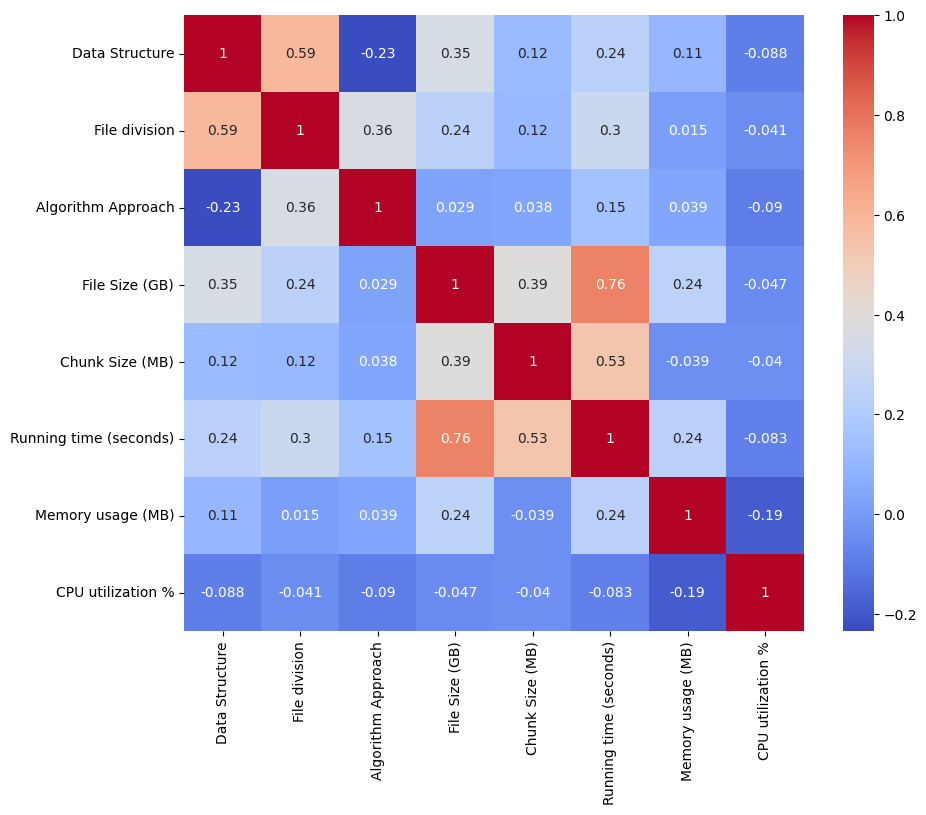

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
